In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
df=pd.read_csv('data (1).csv')
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


Features to analyze:

VitD_levels
Doc_visits
TotalCharge

In [10]:
df_doc = df[['VitD_levels','Doc_visits','TotalCharge']]
df_doc.head()

,VitD_levels,Doc_visits,TotalCharge
0,19.141466,6,3726.702860
1,18.940352,4,4193.190458
2,18.057507,4,2434.234222
3,16.576858,4,2127.830423
4,17.439069,5,2113.073274


In [27]:
mean = df_doc['Doc_visits'].mean()
median = df_doc['Doc_visits'].median()
std = df_doc['Doc_visits'].std()
plus_one_std = mean + std
minus_one_std = mean - std
col = 'Doc_visits'

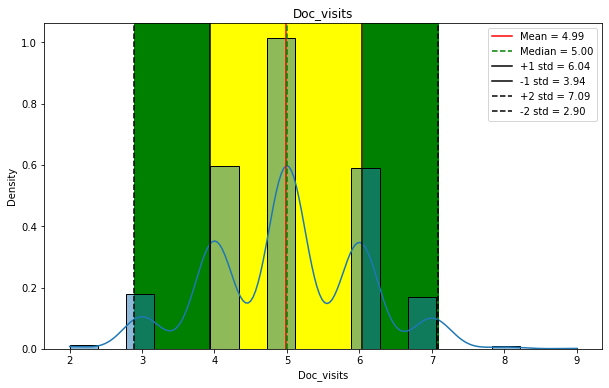

In [36]:
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
plus_two_std = mean + 2 * std
minus_one_std = mean - std
minus_two_std = mean - 2 * std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature, ax = ax, stat='density',kde=True)
ax.axvline(mean, color = 'red', label = f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = .5)
ax.axvline(plus_two_std, ls='--', color = 'black',label=f'+2 std = {plus_two_std:,.2f}')
ax.axvline(minus_two_std, ls='--', color = 'black', label = f'-2 std = {minus_two_std:,.2f}')
ax.axvspan(plus_two_std, minus_two_std, color = 'green', zorder = 0)
ax.set_title(f'{col}')
ax.legend();

In [17]:
from scipy import stats
kurt = stats.kurtosis(df_doc['Doc_visits'], fisher = False)
print("The kurtosis value is ", kurt)

The kurtosis value is  2.9919958083381206


The values are discrete, as there are a certain number of doctor's visits.

The distribution is perfectly normally distrubuted, and is demonstrating no skew as the median and mode values are almost identical.

This is platykurtic, as the pearson calculation returned a value less than 3.

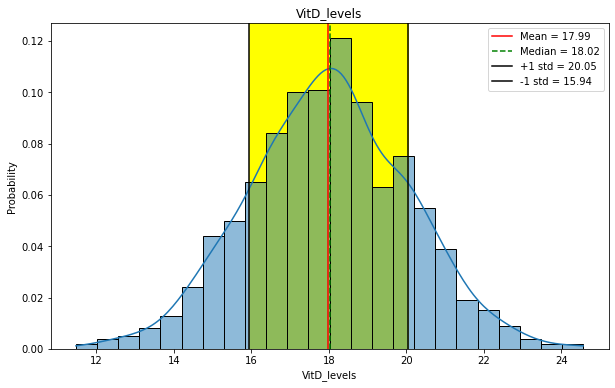

In [37]:
col = 'VitD_levels'
feature = df2[col]
mean = feature.mean()
median = feature.median()
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability',kde=True)
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title(f'{col}')
ax.legend();

In [38]:
kurt = stats.kurtosis(df['VitD_levels'], fisher = False)
kurt

3.013147515833447

The values are continuous, as they are widely and homogoneously spread across the range of values.

The distribution is perfectly normally distrubuted, and is demonstrating no skew as the median and mode values are almost identical.

This is mesokurtic, as the pearson calculation returned a value right around 3.

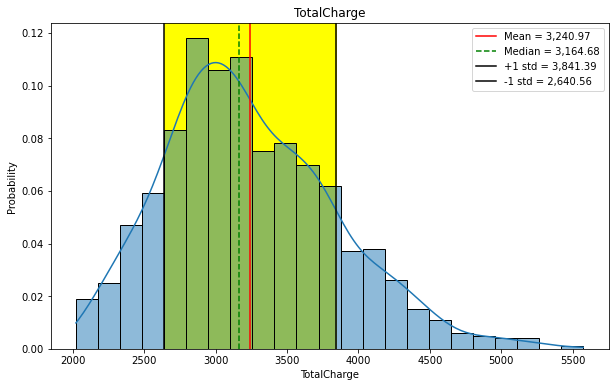

In [39]:
col = 'TotalCharge'
feature = df2[col]
mean = feature.mean()
median = feature.median()
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability',kde=True)
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title(f'{col}')
ax.legend();

In [40]:
kurt = stats.kurtosis(df['TotalCharge'], fisher = False)
kurt

3.2650077463439384

The values are continuous, as they are widely and homogoneously spread across the range of values.

The distribution is positively distrubuted, as the median is positioned to the left of the mode value.

This is leptokurtic, as the pearson calculation returned a value over 3.